In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [56]:
df_test = pd.read_csv('test.csv', sep=';')
df_test_fear = df_test[[col for col in df_test.columns if "Paura" in col and col != 'Paura (Altro)']].astype('float')
df_test_civile = df_test[[col for col in df_test.columns if "Senso Civile" in col and col != 'Senso Civile (Altro)']].replace('Gravissimo', 2).replace('Poco grave', 1).replace('Poco Grave', 1).replace('Indifferente', 0).astype('float')
df_test_time = df_test[[col for col in df_test.columns if "TEMPO" in col]].replace('- di 1ora al giorno', 0).replace('- di 1 ora al giorno', 0).replace('Da 1 a 2 ore', 1).replace('Da1 a 2 ore', 1).replace('Da 1 a 2 ore al giorno', 1).replace('+ di 2 ore', 2).replace('+di 2 ore', 2).replace('+di 2 ore al giorno', 2).astype('float')

In [57]:
clear_df = pd.concat([df_test_fear, df_test_time], axis=1).reset_index(drop=True)
clear_df['MEAN_TEMPO'] = (clear_df['TEMPO_TV'] + clear_df['TEMPO_VIDEOGAMES'] + clear_df['TEMPO_VIDEOGAMES_ELETTRONICI'] + clear_df['TEMPO_SOCIAL'])/4
clear_df['SUM_TEMPO'] = (clear_df['TEMPO_TV'] + clear_df['TEMPO_VIDEOGAMES'] + clear_df['TEMPO_VIDEOGAMES_ELETTRONICI'] + clear_df['TEMPO_SOCIAL'])

In [58]:
fear_col = [col for col in clear_df.columns if "Paura" in col]
civile_col = [col for col in clear_df.columns if "Senso Civile" in col]
time_col = [col for col in clear_df.columns if "TEMPO" in col]

### Factor Analyzer (PCA VARIMAX)

In [59]:
from factor_analyzer import FactorAnalyzer

# Assuming df is your DataFrame and n_factors is the number of components you want to keep (PCA VARIMAX ROTATION)
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
scaler = StandardScaler()
scaled_df_fear = pd.DataFrame(scaler.fit_transform(clear_df[fear_col]), columns=fear_col)

fa.fit(scaled_df_fear)
factor_scores = fa.transform(scaled_df_fear)

# Convert factor scores into a DataFrame
df_scores = pd.DataFrame(factor_scores, columns=[f'Fear_Factor{i+1}' for i in range(factor_scores.shape[1])])
df_scores['SUM_FEAR_FACTOR'] = df_scores['Fear_Factor1'] + df_scores['Fear_Factor2'] + df_scores['Fear_Factor3'] + df_scores['Fear_Factor4']
df_scores['MEAN_FEAR_FACTOR'] = (df_scores['Fear_Factor1'] + df_scores['Fear_Factor2'] + df_scores['Fear_Factor3'] + df_scores['Fear_Factor4'])/4

clear_df = pd.concat([clear_df, df_scores], axis=1).reset_index(drop=True)

In [60]:
from factor_analyzer import FactorAnalyzer

# Assuming df is your DataFrame and n_factors is the number of components you want to keep (PCA VARIMAX ROTATION)
fa = FactorAnalyzer(n_factors=1, rotation='varimax')
scaler = StandardScaler()
scaled_df_fear = pd.DataFrame(scaler.fit_transform(clear_df[fear_col]), columns=fear_col)

fa.fit(scaled_df_fear)
factor_scores = fa.transform(scaled_df_fear)

# Convert factor scores into a DataFrame
df_scores = pd.DataFrame(factor_scores, columns=[f'Prime_Fear_Factor' for i in range(factor_scores.shape[1])])
clear_df = pd.concat([clear_df, df_scores], axis=1).reset_index(drop=True)

h:\Anaconda\lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


In [61]:
# Assuming df is your DataFrame and n_factors is the number of components you want to keep (PCA VARIMAX ROTATION)
fa = FactorAnalyzer(n_factors=1, rotation='varimax')
scaler = StandardScaler()
scaled_df_time = pd.DataFrame(scaler.fit_transform(clear_df[time_col].fillna(clear_df[time_col].mean())), columns=time_col)

fa.fit(scaled_df_time)
factor_scores = fa.transform(scaled_df_time)

# Convert factor scores into a DataFrame
df_scores = pd.DataFrame(factor_scores, columns=[f'Time_Factor{i+1}' for i in range(factor_scores.shape[1])])

clear_df = pd.concat([clear_df, df_scores], axis=1).reset_index(drop=True)

h:\Anaconda\lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


In [71]:
factor_col = [col for col in clear_df.columns if "Factor" in col]

### Result

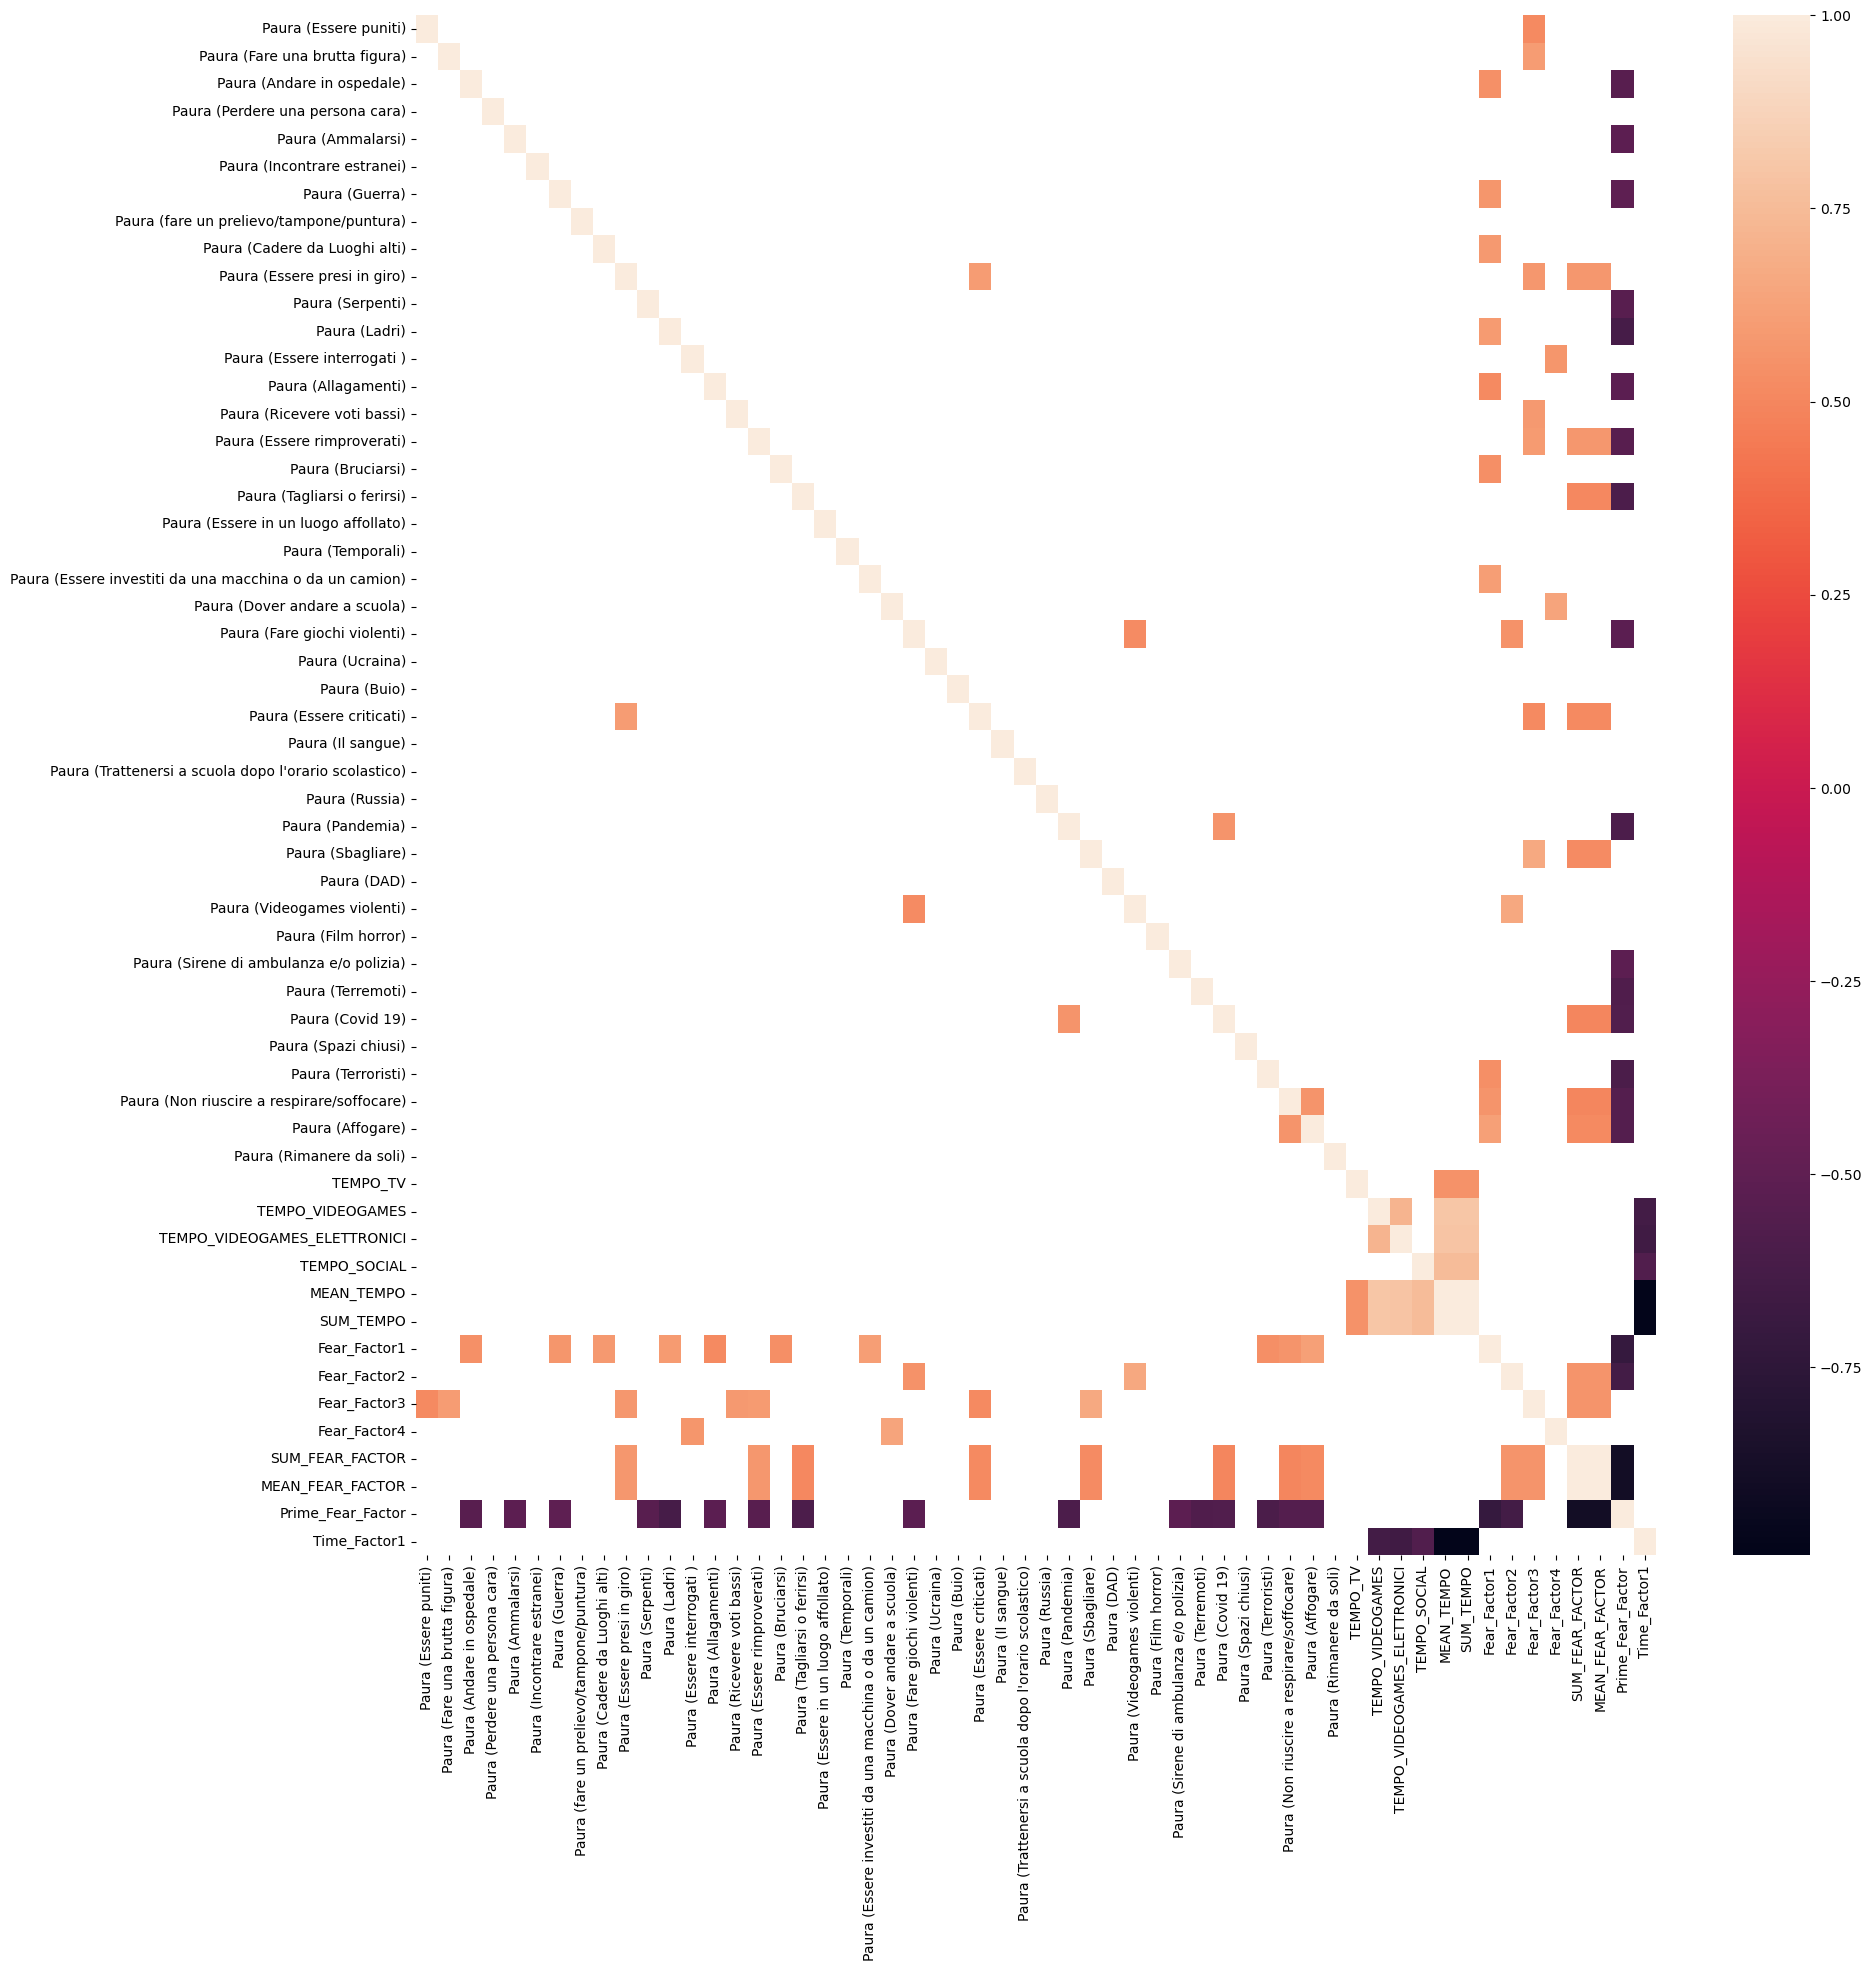

In [105]:
corr = clear_df.fillna(clear_df.mode()).corr('spearman')
# Set a threshold
threshold = 0.5

# Create a mask for correlations greater than the threshold
mask = abs(corr) > threshold

# Apply the mask to the correlation matrix
significant_corr = corr[mask]

plt.figure(figsize=(20,20))
ax = sns.heatmap(significant_corr, annot=False, fmt=".2f")


plt.show()

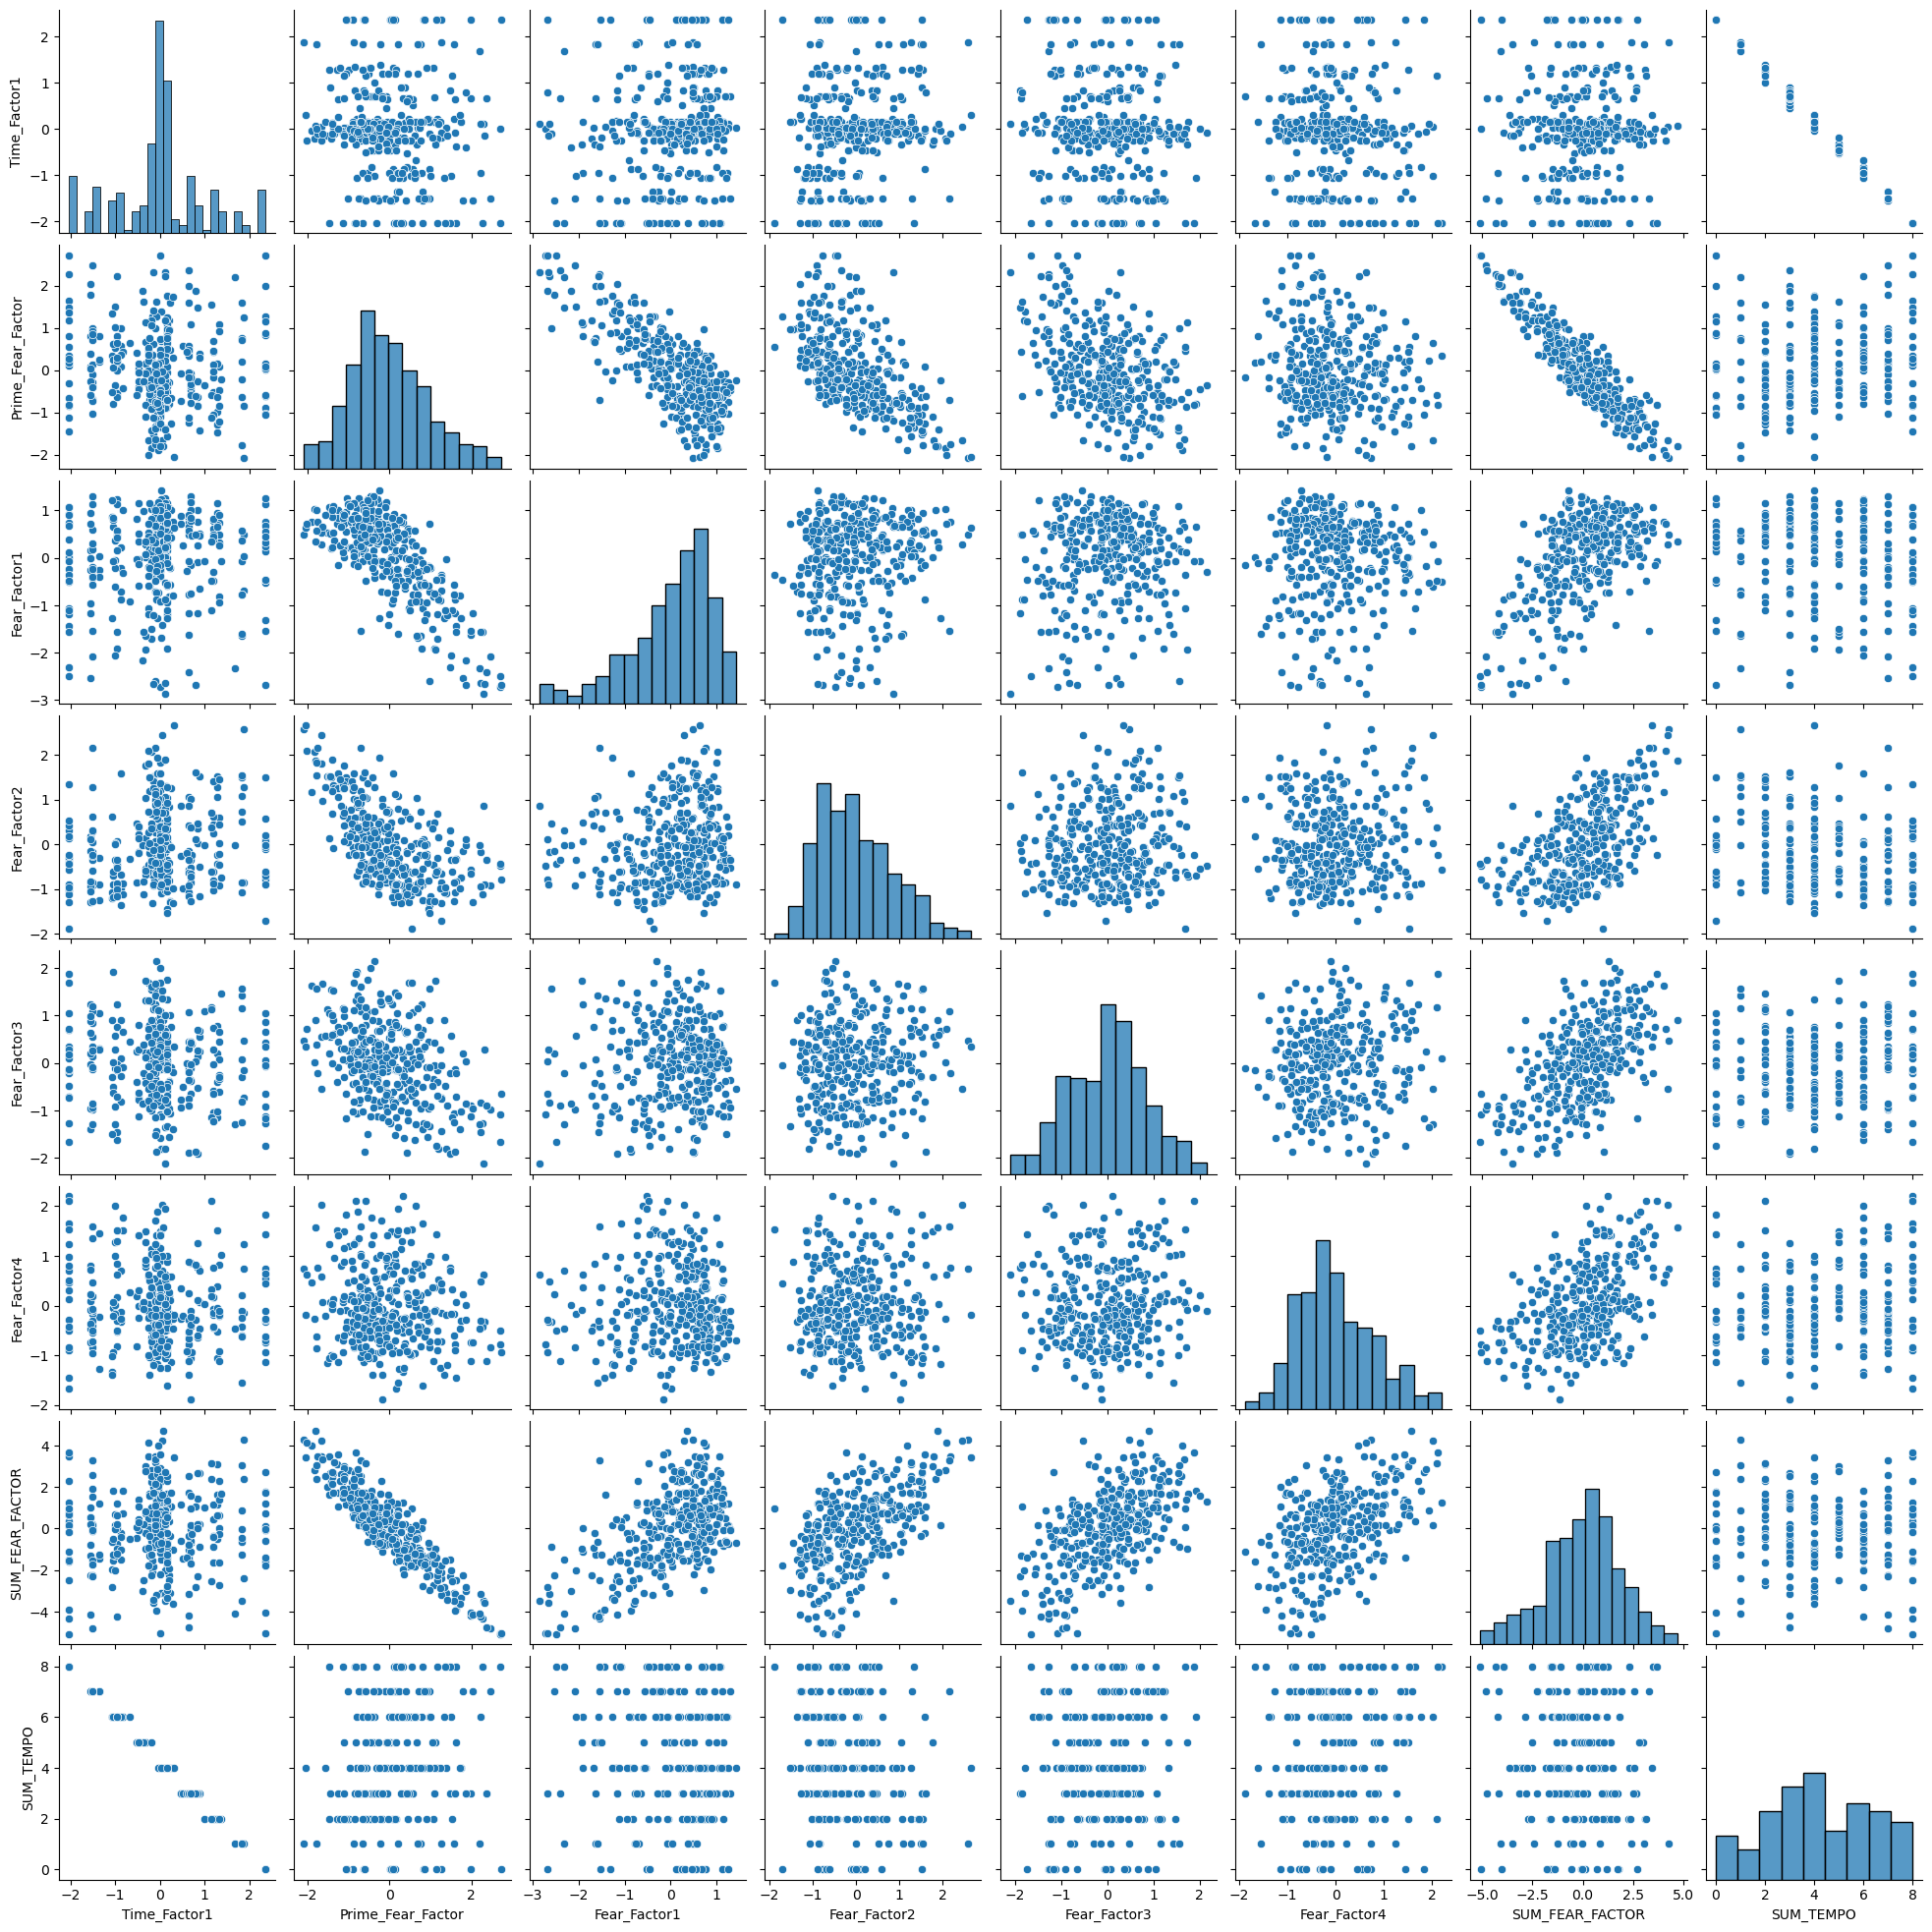

In [87]:
sns.pairplot(clear_df[['Time_Factor1', 'Prime_Fear_Factor', 'Fear_Factor1', 'Fear_Factor2', 'Fear_Factor3', 'Fear_Factor4', 'SUM_FEAR_FACTOR', 'SUM_TEMPO']])

In [104]:
clear_df[['Fear_Factor3', 'Time_Factor1']].corr()

,Fear_Factor3,Time_Factor1
Fear_Factor3,1.000000,-0.086868
Time_Factor1,-0.086868,1.000000


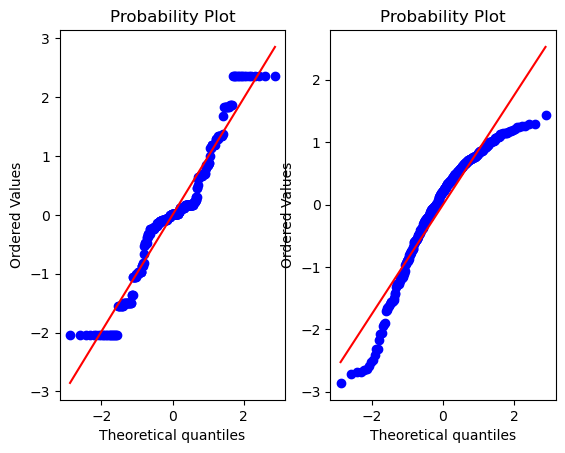

In [98]:
import scipy.stats as stats

plt.subplot(1,2,1)
stats.probplot(clear_df['Time_Factor1'], dist='norm', plot=plt)

plt.subplot(1,2,2)
stats.probplot(clear_df['Fear_Factor1'], dist='norm', plot=plt)
plt.show()

In [101]:
shapiro_test_fear_factor1 = stats.shapiro(clear_df['Fear_Factor1'])
shapiro_test_time_factor = stats.shapiro(clear_df['Time_Factor1'])
print(f"Shapiro test statistic (Fear_Factor1): {shapiro_test_fear_factor1[0]}, p-value: {shapiro_test_fear_factor1[1]}")
print(f"Shapiro test statistic (Time_Factor1): {shapiro_test_time_factor[0]}, p-value: {shapiro_test_time_factor[1]}")

Shapiro test statistic (Fear_Factor1): 0.9211788177490234, p-value: 1.3303661557800828e-12
Shapiro test statistic (Time_Factor1): 0.9434903860092163, p-value: 2.6885560444611656e-10


-1.0301407105057263